# Import Python Libraries

In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive')
# 
# # Import my python files
# !cp /content/gdrive/MyDrive/University/Year\ 2/AIGP/Programs/AI-Game-Programming/Colab\ Notebooks/ANNFunctions.py .

# Basic ANN activation functions

**Sign Function**

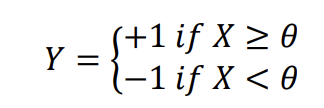

**Step Function**

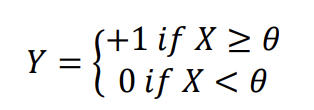

**Sigmoid
 Function**

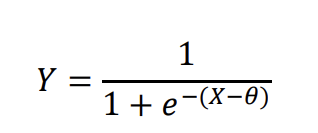

In [ ]:
# First Party (Made by me)
import ANNFunctions as ann

# Third Party
import numpy as np
import matplotlib.pyplot as plt

# ACTIVATION FUNCTIONS #
# Sign Function
def Sign(X, THRESHOLD):
    if X >= THRESHOLD: return 1
    else: return -1

# Step function
def Step(X, THRESHOLD):
    if X >= THRESHOLD: return 1
    else: return 0

# Sigmoid function
def Sigmoid(X, THRESHOLD):
   return (1 / (1 + np.exp(-(X- THRESHOLD))))


# EPOCH FUNCTIONS #
# Input Function
def Input(X1,W1, X2,W2):
    return ((X1*W1) + (X2*W2))

# Error Function
def Error(YD, Y):
    return YD - Y

# Input Function
def Learn(W, LEARN_RATE, X, E):
    return (W + (LEARN_RATE * X * E))


# LOGGING #
def PrintWeights(W1,W2):
    print("w1 = " + str(W1) + " w2 = " + str(W2))

print("ANN Functions compiled successfully")

# Forward Feedback Perceptron training

In [5]:
# First Party (Made by me)
import ANNFunctions as ann

# Third Party
import numpy as np
import matplotlib.pyplot as plt

# Threshold for activation functions
THRESHOLD = 0.2

# Learning rate for weight and error calculation
LEARN_RATE = 0.1

# Inputs and Desired Outputs
X1 = [0.0, 0.0, 1.0, 1.0]
X2 = [0.0, 1.0, 0.0, 1.0]
YD = [0.0, 0.0, 0.0, 1.0]

INPUT_COUNT_MAX = len(X1)
# NUM_INPUTS = 2

# Epoch Passes (Starts at epoch 1)
epochCount = 1
EPOCH_COUNT_MAX = 5

# Initial input weights
w = [0.3, -0.2]
# NUM_WEIGHTS = len(w)

# Feed Forward Propogation Algorithm
while(epochCount < EPOCH_COUNT_MAX):
    for i in range(0,INPUT_COUNT_MAX,1):
        # Produce input from random weights
        X = ann.Input(X1[i], w[0], X2[i], w[1])

        # Produce output from input using activation funcntion
        Y = ann.Step(X, THRESHOLD)

        # Calculate error ( error = yD - Y)
        ERROR = ann.Error(YD[i], Y)

        # Adjust weights based on error
        w[0] = ann.Learn(w[0], LEARN_RATE, X1[i], ERROR)
        w[1] = ann.Learn(w[1], LEARN_RATE, X2[i], ERROR)
    epochCount += 1

# Print Results
ann.PrintEpochs(epochCount)
ann.PrintWeights(w)

Epoch Units = 5
w0 = 0.19999999999999998
w1 = 0.1


Task 2.1: Range of the number of epoch
Find the minimum number of epochs. Is 5 (in the example code) the minimum number of epoch 
for this training?

Epoch Results

Epoch Units = 2
w0 = 0.3
w1 = -0.1

Epoch Units = 3
w0 = 0.3
w1 = 0.0

Epoch Units = 4
w0 = 0.3
w1 = 0.1

Epoch Units = 5
w0 = 0.19999999999999998
w1 = 0.1

5 is the minimum number of epochs to reach desired output